<a href="https://colab.research.google.com/github/Sidra-g/Deep-Learning/blob/main/Customer_Churn_ANN_with_Improved_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('https://drive.google.com/uc?id=1gBb6QBM9PUKjTzRbXNbmg1KfjA2jBeo3')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5993,5994,15758856,Kable,597,France,Male,45,7,0.0,2,0,0,167756.45,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [ ]:
x=df.drop(['Exited'],axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [ ]:
y_train

,Exited
7389,0
9275,0
2995,0
5316,0
356,0
...,...
9225,0
4859,0
3264,0
9845,0


In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler.
scaler = StandardScaler()

# Fit and transform the training data.
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing data using the same scaler.
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled.shape

(8000, 11)

In [ ]:
x_train_scaled.shape[1]

11

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Create the model
model = Sequential()

# Input layer
model.add(Dense(11, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(BatchNormalization())  # Add batch normalization
model.add(Dropout(0.3))          # Optional: Dropout for regularization

# Hidden layer 1
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Dropout(0.3))          # Optional: Dropout for regularization

# Hidden layer 2
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())  # Add batch normalization

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 11)                  │              44 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 4)                   │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 315 (1.23 KB)

 Non-trainable params: 46 (184.00 B)

In [ ]:
# Train the model
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4247 - loss: 0.9097 - val_accuracy: 0.5619 - val_loss: 0.6458
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6638 - loss: 0.6217 - val_accuracy: 0.7950 - val_loss: 0.5309
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7872 - loss: 0.5338 - val_accuracy: 0.7962 - val_loss: 0.4982
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.5022 - val_accuracy: 0.7969 - val_loss: 0.4807
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7839 - loss: 0.5062 - val_accuracy: 0.7969 - val_loss: 0.4692
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.4817 - val_accuracy: 0.7969 - val_loss: 0.4575
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7985 - loss: 0.4704 - val_accuracy: 0.7969 - val_loss: 0.4447
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7925 - loss: 0.4657 - val_accu

In [ ]:
model.layers[0].get_weights()

[array([[ 1.66038591e-02, -2.47869883e-02,  4.08523865e-02,
         -8.95142108e-02, -1.23185575e-01, -4.42854688e-02,
         -2.09691823e-01,  3.36977420e-04, -4.67534587e-02,
         -1.00550719e-01,  2.08685175e-01],
        [-8.82601321e-01,  1.42193839e-01, -4.90150213e-01,
         -2.01606289e-01,  2.05456421e-01,  1.41795427e-01,
          1.56733736e-01,  2.45795637e-01, -6.62997067e-01,
          3.62880468e-01, -9.32613790e-01],
        [ 3.80000770e-02, -2.65780720e-03,  3.25795591e-01,
          1.79611444e-01,  1.46551430e-01, -1.87430400e-02,
          3.29617709e-01, -1.23152547e-01,  1.18389174e-01,
          1.47594409e-02, -2.00314432e-01],
        [ 8.53335857e-02,  7.07660541e-02,  1.27922773e-01,
         -3.95740181e-01, -1.98839098e-01, -3.98691505e-01,
          5.74958205e-01,  4.33633775e-01,  3.45659882e-01,
         -1.56599119e-01, -3.56810421e-01],
        [-3.88917848e-02,  5.41200578e-01,  3.77224207e-01,
          2.93070763e-01, -2.96376497e-02, -

In [ ]:
model.layers[1].get_weights()

[array([0.99614686, 1.3873074 , 1.0139344 , 0.97455615, 0.7097278 ,
        1.0066266 , 0.6641943 , 0.9587198 , 1.0274774 , 0.99859405,
        0.9879177 ], dtype=float32),
 array([ 0.38211754, -0.00300403,  0.05297627,  0.20870689,  0.09940274,
        -0.02589784, -0.1499891 , -0.04780799,  0.19275972, -0.04107367,
         0.4085715 ], dtype=float32),
 array([0.8743339 , 0.02741949, 0.33988208, 0.76665527, 0.35708627,
        0.14231218, 0.35228443, 0.10785095, 0.36523554, 0.5547613 ,
        0.6171422 ], dtype=float32),
 array([0.3982819 , 0.02655211, 0.28748515, 0.617957  , 0.22398168,
        0.0710214 , 0.4222382 , 0.09112353, 0.24117903, 0.44784638,
        0.44928467], dtype=float32)]

In [ ]:
model.layers[2].get_weights()

[]

In [ ]:
ylog= model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred= np.where(ylog > 0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

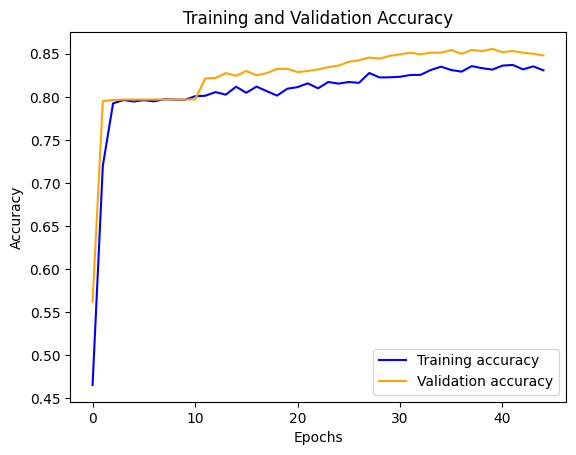

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy with a specific color
plt.plot(history.history['accuracy'], color='blue', label='Training accuracy')

# Plot validation accuracy with a specific color
plt.plot(history.history['val_accuracy'], color='orange', label='Validation accuracy')

# Add labels, title, and legend for better understanding
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plot
plt.show()

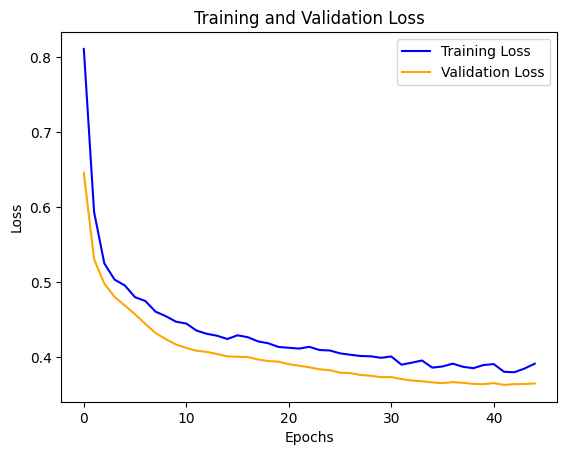

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss with a specific color
plt.plot(history.history['loss'], color='blue', label='Training Loss')

# Plot validation loss with a specific color
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')

# Add labels, title, and legend for better understanding
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plot
plt.show()